In [1]:
#!/usr/bin/env python
import numpy as np
import time
from datetime import date
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/Users/mgrecu/GPM/ORO_old/retr")

import lkTables
from radarRetrSubs import *


import pickle
dateL=[]


from netCDF4 import Dataset
from scipy.ndimage import gaussian_filter
import glob
fs=sorted(glob.glob("2A-CS/2A*"))

from numpy import *
def readOrb(orb):
    fh=Dataset(orb)
    sfcPrecip=fh['FS/SLV/precipRateNearSurface'][:,:]
    precipRate=fh['FS/SLV/precipRate'][:,:]
    lon=fh['FS/Longitude'][:,:]
    lat=fh['FS/Latitude'][:,:]
    hzero=fh['FS/VER/heightZeroDeg'][:,:]
    pType=fh['FS/CSF/typePrecip'][:,:]
    stormTop=fh['FS/PRE/heightStormTop'][:,:]
    pType=(pType/1e7).astype(np.int)
    bzd=fh['FS/VER/binZeroDeg'][:,:]
    zku=fh['FS/PRE/zFactorMeasured'][:,:,:,0]
    bcf=fh['FS/PRE/binClutterFreeBottom'][:,:]
    return sfcPrecip,hzero,pType,stormTop,bzd,zku,bcf,precipRate,fh
eRad=6357e3


orbL=sorted(glob.glob("/Users/mgrecu/GPM/ORO_old/2A-CS/2A-CS*CONUS*HDF5"))
cmbOrbL=sorted(glob.glob("/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS*CONUS*HDF5"))

nt=0
sfcPrecipL=[]
stormTopL=[]
zKuFL1=[]
zKuFL2=[]
zKuL=[]
dbinL=[]
sfcPrecip1L=[]
pRateL=[]
n1=2
for orb in fs[:200]:
    sfcPrecip,hzero,pType,stormTop,bzd,zku,bcf,precipRate,fh=readOrb(orb)

In [2]:
print(len(cmbOrbL))
print(len(orbL))
print(orbL[0])
fname=orbL[0].replace("DPR.V9-20211125","DPRGMI.CORRA2022")
icount=0
for f in orbL:
    fname=f.replace("DPR.V9-20211125","DPRGMI.CORRA2022")
    fname=fname.replace("2A-CS-","2B-CS-")
    if fname in cmbOrbL:
        icount+=1
        #print(icount)
        continue
    #break
print(fname)
print(f)
print(cmbOrbL[0])
print(icount)

659
653
/Users/mgrecu/GPM/ORO_old/2A-CS/2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S011631-E012509.029377.V07A.HDF5
/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20191021-S060735-E061606.032071.V07A.HDF5
/Users/mgrecu/GPM/ORO_old/2A-CS/2A-CS-CONUS.GPM.DPR.V9-20211125.20191021-S060735-E061606.032071.V07A.HDF5
/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20190501-S011631-E012509.029377.V07A.HDF5
653


In [3]:
import numpy as np
def readOrb(orb):
    fh=Dataset(orb)
    sfcPrecip=fh['FS/SLV/precipRateNearSurface'][:,:]
    precipRate=fh['FS/SLV/precipRate'][:,:]
    lon=fh['FS/Longitude'][:,:]
    lat=fh['FS/Latitude'][:,:]
    hzero=fh['FS/VER/heightZeroDeg'][:,:]
    pType=fh['FS/CSF/typePrecip'][:,:]
    stormTop=fh['FS/PRE/heightStormTop'][:,:]
    pType=(pType/1e7).astype(np.int32)
    bzd=fh['FS/VER/binZeroDeg'][:,:]
    zku=fh['FS/PRE/zFactorMeasured'][:,:,:,0]
    zka=fh['FS/PRE/zFactorMeasured'][:,:,:,1]
    bcf=fh['FS/PRE/binClutterFreeBottom'][:,:]
    bsfc=fh['FS/PRE/binRealSurface'][:,:]
    piah=fh['FS/SRT/PIAhybrid'][:,:]
    return sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,bsfc,piah,fh

In [4]:
orbL=sorted(glob.glob("/Users/mgrecu/GPM/ORO_old/2A-CS/2A-CS*CONUS*HDF5"))
print(len(orbL))
convPixelsL=[]
totalRainL=[]
d={}
import tqdm
for orb in tqdm.tqdm(orbL[:]):
    sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,bsfc,piah,fh=readOrb(orb)
    a=np.nonzero(pType==2)
    convPixelsL.append(len(a[0]))
    fname=orb.split("/")[-1]
    totalRainL.append(np.sum(sfcPrecip[a]))
    d[fname]=(len(a[0]),np.sum(sfcPrecip[a]))

653


  8%|▊         | 52/653 [00:17<03:43,  2.69it/s]

In [33]:
#h1=plt.hist(convPixelsL,bins=100)
a=np.nonzero(np.array(convPixelsL)>700)
print(len(a[0]))
orbL=np.array(orbL)
for f1 in orbL[a[0]]:
    sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,bsfc,piah,fh=readOrb(f1)
    n=zku.shape[0]
    n3=n//3
    for k in range(3):
        plt.subplot(3,2,2*k+1)
        plt.pcolormesh(zku[k*n3:k*n3+n3,24,:].T,vmin=0,vmax=50,cmap="jet")
    #plt.pcolormesh(sfcPrecip.T,vmin=0,vmax=50,cmap="jet")
        plt.ylim(175,50)
        plt.subplot(3,2,2*k+2)
        plt.pcolormesh(zka[k*n3:k*n3+n3,24,:].T,vmin=0,vmax=30,cmap="jet")
    #plt.pcolormesh(sfcPrecip.T,vmin=0,vmax=50,cmap="jet")
        plt.ylim(175,50)
    plt.savefig(f1.split("/")[-1]+".png")
    plt.close('all')
print(zku.shape)

60
(741, 49, 176)


In [4]:
import netCDF4 as nc
def readCMB(fname): # reads relevant data from the CMB file
    fh_cmb=nc.Dataset(fname)
    dZ=0 # offset between the CMB and DPR
    qv=fh_cmb["KuKaGMI/vaporDensity"][:,:,:]
    press=fh_cmb["KuKaGMI/airPressure"][:,:,:]
    envNodes=fh_cmb["KuKaGMI/envParamNode"][:,:,:]
    airTemp=fh_cmb["KuKaGMI/airTemperature"][:,:,:]
    #skTemp=fh_cmb["KuKaGMI/skinTemperature"][:,:]
    binNodes=fh_cmb["KuKaGMI/phaseBinNodes"][:,:]
    pwc=fh_cmb["KuKaGMI/precipTotWaterCont"][:,:,:]
    #sfcEmiss=fh_cmb["KuKaGMI/surfEmissivity"][:,:,:]
    dm=fh_cmb["KuKaGMI/precipTotDm"][:,:,:]
    #cldw=fh_cmb["KuKaGMI/cloudLiqWaterCont"][:,:,:]
    sfcBin=fh_cmb["KuKaGMI/Input/surfaceRangeBin"][:,:,:]
    zCorrected=fh_cmb["KuGMI/correctedReflectFactor"][:,:,:]+dZ
    #pType=fh_cmb["KuKaGMI/Input/precipitationType"][:,:]
    #lon=fh_cmb["KuKaGMI/Longitude"][:,:]
    #lat=fh_cmb["KuKaGMI/Latitude"][:,:]
    return qv,press,envNodes,airTemp,binNodes,pwc,dm,sfcBin,zCorrected,pType

In [14]:
ic=0
cfadKu=np.zeros((100,40))
cfadKa=np.zeros((100,40))
zku9L=[]
zka9L=[]
precipRate9L=[]
bzd9L=[]
bcf9L=[]
pType9L=[]
bsfc9L=[]
piah9L=[]
zCorrected9L=[]
dm9L=[]
binNodes9L=[]
qvL=[]
pressL=[]
envNodesL=[]
airTempL=[]
for f1 in orbL[:]:
    sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,bsfc,piah,fh=readOrb(f1)
    fname=f1.replace("DPR.V9-20211125","DPRGMI.CORRA2022")
    fname=fname.replace("2A-CS-","2B-CS-")
    if fname not in cmbOrbL:
        continue
    qv,press,envNodes,airTemp,binNodes,pwc,dm,sfcBin,zCorrected,pTypeCMB=readCMB(fname)

    ac=np.nonzero(pType==2)
    n=zku.shape[0]
    n1=zCorrected.shape[0]
    if n1!=n:
        print("mismatch")
        #continue
        break
    for i1,j1 in zip(ac[0],ac[1]):
        if hzero[i1,j1]>3500 and bcf[i1,j1]-bzd[i1,j1]>24 and stormTop[i1,j1]>4000:
            if i1>3 and i1<n-3 and j1>3 and j1<49-3:
                zCorrected9L.append(zCorrected[i1-3:i1+4,j1-3:j1+4,:])
                dm9L.append(dm[i1-3:i1+4,j1-3:j1+4,:])
                binNodes9L.append(binNodes[i1-3:i1+4,j1-3:j1+4,:])
                zku9L.append(zku[i1-3:i1+4,j1-3:j1+4,:])
                zka9L.append(zka[i1-3:i1+4,j1-3:j1+4,:])
                precipRate9L.append(precipRate[i1-3:i1+4,j1-3:j1+4])
                bzd9L.append(bzd[i1-3:i1+4,j1-3:j1+4])
                bcf9L.append(bcf[i1-3:i1+4,j1-3:j1+4])
                pType9L.append(pType[i1-3:i1+4,j1-3:j1+4])
                bsfc9L.append(bsfc[i1-3:i1+4,j1-3:j1+4,:])
                piah9L.append(piah[i1-3:i1+4,j1-3:j1+4,:])
                qvL.append(qv[i1-3:i1+4,j1-3:j1+4,:])
                pressL.append(press[i1-3:i1+4,j1-3:j1+4,:])
                envNodesL.append(envNodes[i1-3:i1+4,j1-3:j1+4,:])
                airTempL.append(airTemp[i1-3:i1+4,j1-3:j1+4,:])
            ic+=1
            for k in range(bzd[i1,j1]-66,min(bzd[i1,j1]+34,bcf[i1,j1])):
                if zku[i1,j1,k]>12:
                    iz=int(zku[i1,j1,k])-12
                    if iz > 39:
                        iz=39
                    cfadKu[k-(bzd[i1,j1]-66),iz]+=1
                if zka[i1,j1,k]>12:
                    iz=int(zka[i1,j1,k])-12
                    if iz > 39:
                        iz=39
                    cfadKa[k-(bzd[i1,j1]-66),iz]+=1

In [8]:
print(f1)
print(fname)


/Users/mgrecu/GPM/ORO_old/2A-CS/2A-CS-CONUS.GPM.DPR.V9-20211125.20191021-S060735-E061606.032071.V07A.HDF5
/Users/mgrecu/GPM/ORO_old/2A-CS/2B-CS-CONUS.GPM.DPRGMI.CORRA2022.20191021-S060735-E061606.032071.V07A.HDF5


In [9]:
print(fh["FS/PRE/binRealSurface"].shape)
print(np.array(zCorrected9L).shape)

(732, 49, 2)
(33739, 7, 7, 88)


In [15]:
import xarray as xr 
zku9=xr.DataArray(np.array(zku9L),dims=['nt','n7','n7','nBins'])
zka9=xr.DataArray(np.array(zka9L),dims=['nt','n7','n7','nBins'])
precipRate9=xr.DataArray(np.array(precipRate9L),dims=['nt','n7','n7','nBins'])
bzd9=xr.DataArray(np.array(bzd9L),dims=['nt','n7','n7'])
bcf9=xr.DataArray(np.array(bcf9L),dims=['nt','n7','n7'])
pType9=xr.DataArray(np.array(pType9L),dims=['nt','n7','n7'])
bsfc9=xr.DataArray(np.array(bsfc9L),dims=['nt','n7','n7','n2'])
piah9=xr.DataArray(np.array(piah9L),dims=['nt','n7','n7','n2'])
zCorrected9=xr.DataArray(np.array(zCorrected9L),dims=['nt','n7','n7','nBins2'])
dm9=xr.DataArray(np.array(dm9L),dims=['nt','n7','n7','nBins2'])
binNodes9=xr.DataArray(np.array(binNodes9L),dims=['nt','n7','n7','n5'])
qv=xr.DataArray(np.array(qvL),dims=['nt','n7','n7','n10'])
press=xr.DataArray(np.array(pressL),dims=['nt','n7','n7','n10'])
envNodes=xr.DataArray(np.array(envNodesL),dims=['nt','n7','n7','n10'])
airTemp=xr.DataArray(np.array(airTempL),dims=['nt','n7','n7','n10'])


In [11]:
print(zku9.shape)
print(zka9.shape)
print(precipRate9.shape)
print(bzd9.shape)

(33739, 7, 7, 176)
(33739, 7, 7, 176)
(33739, 7, 7, 176)
(33739, 7, 7)


In [16]:

ds=xr.Dataset({'zku':zku9,'zka':zka9,'precipRate':precipRate9,'bzd':bzd9,'bcf':bcf9,'pType':pType9,\
               'bsfc':bsfc9,'piah':piah9,'zCorrected':zCorrected9,'dm':dm9,'binNodes':binNodes9,\
                'qv':qv,'press':press,'envNodes':envNodes,'airTemp':airTemp})


In [19]:

ds.to_netcdf("convectProfiles.nc",encoding={'zku':{'zlib':True,'complevel':5},'zka':{'zlib':True,'complevel':5},\
                                            'precipRate':{'zlib':True,'complevel':5},'bzd':{'zlib':True,'complevel':5},\
                                            'bcf':{'zlib':True,'complevel':5},'pType':{'zlib':True,'complevel':5},\
                                            'bsfc':{'zlib':True,'complevel':5},'piah':{'zlib':True,'complevel':5},\
                                            'zCorrected':{'zlib':True,'complevel':5},\
                                            'dm':{'zlib':True,'complevel':5},'binNodes':{'zlib':True,'complevel':5},\
                                            'qv':{'zlib':True,'complevel':5},'press':{'zlib':True,'complevel':5},\
                                            'envNodes':{'zlib':True,'complevel':5},'airTemp':{'zlib':True,'complevel':5}})


35707


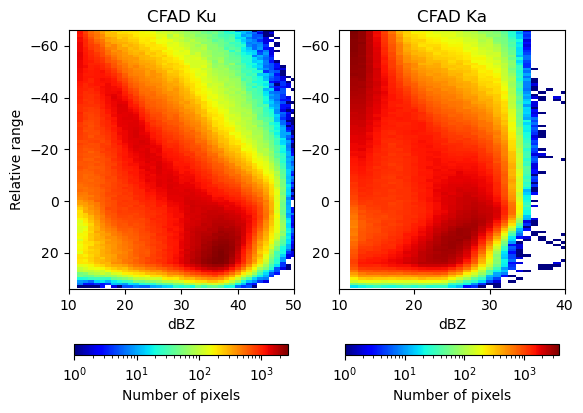

In [102]:
# save the cfadKu and cfadKa in netcdf format
import xarray as xr
ds=xr.Dataset({'cfadKu':xr.DataArray(cfadKu,dims=['nBins','nZ']),'cfadKa':xr.DataArray(cfadKa,dims=['nBins','nZ'])})
ds.to_netcdf("cfadDbz.nc",encoding={'cfadKu':{'zlib':True,'complevel':9},'cfadKa':{'zlib':True,'complevel':9}})
from matplotlib.colors import LogNorm
plt.subplot(1,2,1)
plt.pcolormesh(12+np.arange(40),arange(100)-66,cfadKu,cmap="jet",norm=LogNorm())
plt.title('CFAD Ku')
plt.ylabel('Relative range')
plt.xlabel('dBZ')
plt.ylim(34,-66)
plt.xlim(10,50)
plt.colorbar(orientation="horizontal",shrink=0.95,label="Number of pixels")
plt.subplot(1,2,2)
plt.title('CFAD Ka')
plt.pcolormesh(12+np.arange(40),arange(100)-66,cfadKa,cmap="jet",norm=LogNorm())
plt.ylim(34,-66)
plt.xlabel('dBZ')
#plt.ylabel('Relative range')
plt.xlim(10,40)
plt.colorbar(orientation="horizontal",shrink=0.95,label="Number of pixels")
plt.savefig("cfadDbz.png")
print(ic)

In [56]:
print(stormTop)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [4018.7216796875 4883.18310546875 4848.7919921875 ... -- -- --]
 [4387.56640625 5162.22607421875 5206.08447265625 ... -- -- --]
 [4874.67333984375 5173.72705078125 6071.40185546875 ... -- -- --]]
